In [79]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib.cm as cm
import matplotlib.colors as colors
from pandas.io.json import json_normalize
import numpy as np
import requests

In [45]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                       

## Import Census Data


In [232]:
# The code was removed by Watson Studio for sharing.

,NOME_UDH,ESPVIDA,T_ANALF18M,T_FREQ6A17,RDPC,P_FUND,P_MED,P_SUPER,REN0,RENOCUP,IDHM,IDHM_E,IDHM_L,IDHM_R,DISTRITO
0,Jardim Anália Franco / Vila Formosa : Hospital...,79.91,1.45,96.11,1801.17,83.89,70.22,31.00,0.89,2524.57,0.866,0.815,0.915,0.870,Vila Formosa
1,Vila Califórnia,80.04,1.29,98.10,2000.87,87.80,74.85,37.16,1.24,2599.58,0.870,0.809,0.917,0.887,Carrão
2,Vila Carrão / Vila Formosa : Cemitério Vila Fo...,77.05,2.22,96.50,890.75,74.98,53.96,12.56,1.15,1398.04,0.790,0.750,0.868,0.757,Carrão
3,Vila Formosa : Escola Municipal de Ensino Fund...,79.61,2.09,91.08,1233.65,76.97,56.83,17.48,2.03,1714.03,0.816,0.736,0.910,0.810,Vila Formosa
4,Aricanduva : Centro de Educação Infantil Coryn...,79.56,2.70,94.93,1180.17,82.71,57.48,21.37,0.95,1789.84,0.820,0.756,0.909,0.803,Aricanduva


In [233]:
df_Census.drop(columns= ['NOME_UDH'], inplace=True)
df_Census.head()

,ESPVIDA,T_ANALF18M,T_FREQ6A17,RDPC,P_FUND,P_MED,P_SUPER,REN0,RENOCUP,IDHM,IDHM_E,IDHM_L,IDHM_R,DISTRITO
0,79.91,1.45,96.11,1801.17,83.89,70.22,31.00,0.89,2524.57,0.866,0.815,0.915,0.870,Vila Formosa
1,80.04,1.29,98.10,2000.87,87.80,74.85,37.16,1.24,2599.58,0.870,0.809,0.917,0.887,Carrão
2,77.05,2.22,96.50,890.75,74.98,53.96,12.56,1.15,1398.04,0.790,0.750,0.868,0.757,Carrão
3,79.61,2.09,91.08,1233.65,76.97,56.83,17.48,2.03,1714.03,0.816,0.736,0.910,0.810,Vila Formosa
4,79.56,2.70,94.93,1180.17,82.71,57.48,21.37,0.95,1789.84,0.820,0.756,0.909,0.803,Aricanduva


In [234]:
columns_name = ['Life Expectancy','Iliteracy Rate','School Freq. Rate','Per Capita Income','% of Elementary School Degree','% of High School Degree', '% of College Degree', 'No income', 'Household income', 'IDHM', 'Education IDHM','Health IDHM','Income IDHM','District Name']

In [235]:
df_Census.columns = columns_name
df_Census.head()

,Life Expectancy,Iliteracy Rate,School Freq. Rate,Per Capita Income,% of Elementary School Degree,% of High School Degree,% of College Degree,No income,Household income,IDHM,Education IDHM,Health IDHM,Income IDHM,District Name
0,79.91,1.45,96.11,1801.17,83.89,70.22,31.00,0.89,2524.57,0.866,0.815,0.915,0.870,Vila Formosa
1,80.04,1.29,98.10,2000.87,87.80,74.85,37.16,1.24,2599.58,0.870,0.809,0.917,0.887,Carrão
2,77.05,2.22,96.50,890.75,74.98,53.96,12.56,1.15,1398.04,0.790,0.750,0.868,0.757,Carrão
3,79.61,2.09,91.08,1233.65,76.97,56.83,17.48,2.03,1714.03,0.816,0.736,0.910,0.810,Vila Formosa
4,79.56,2.70,94.93,1180.17,82.71,57.48,21.37,0.95,1789.84,0.820,0.756,0.909,0.803,Aricanduva


In [236]:
df_CensusGrouped = df_Census.groupby('District Name').mean()
df_CensusGrouped.head()

,Life Expectancy,Iliteracy Rate,School Freq. Rate,Per Capita Income,% of Elementary School Degree,% of High School Degree,% of College Degree,No income,Household income,IDHM,Education IDHM,Health IDHM,Income IDHM
District Name,,,,,,,,,,,,,
Alto de Pinheiros,81.640000,0.610000,96.210000,5207.070000,94.410000,89.340000,70.020000,1.310000,6474.970000,0.936000,0.870000,0.944000,1.000000
Anhanguera,72.767778,6.422222,92.704444,561.633333,62.257778,37.545556,5.527778,0.914444,1004.542222,0.713889,0.673556,0.796222,0.678667
Aricanduva,76.353846,4.421538,92.140000,1243.473077,72.158462,51.696154,18.118462,1.226923,1835.792308,0.776154,0.706769,0.855923,0.774615
Artur Alvim,76.147500,3.450000,93.063333,826.616667,70.170000,50.778333,13.875000,1.033333,1279.325833,0.760500,0.702250,0.852583,0.735500
Barra Funda,77.530000,5.500000,95.500000,2449.790000,78.090000,63.806667,38.766667,1.760000,3100.580000,0.839667,0.783333,0.875667,0.866667


## Use K-Mean to group the Districts by caracteristics

In [237]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [238]:
X = df_CensusGrouped.values[:,:]
X_census = StandardScaler().fit_transform(X)
X_census

array([[ 1.84686871, -1.76282174,  1.84983672, ...,  2.11330764,
         1.84546481,  2.45246132],
       [-1.55967856,  1.52632061, -0.37533331, ..., -0.76229473,
        -1.55928775, -1.25735816],
       [-0.18278435,  0.39413167, -0.73361743, ..., -0.27610474,
        -0.18379922, -0.14962241],
       ...,
       [ 0.29242087, -0.38824822,  1.03068498, ...,  0.23961198,
         0.29259045,  0.15614463],
       [ 0.35199812, -0.03713809, -0.4384562 , ...,  0.26563553,
         0.35428559,  0.50839789],
       [ 1.01666946, -1.18528834,  0.03831557, ...,  0.34045324,
         1.01475638,  0.50968068]])

In [239]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X_census)
labels = k_means.labels_
print(labels)

[2 0 3 3 1 1 1 0 3 1 1 3 1 1 1 3 3 0 1 1 3 0 3 0 2 3 3 1 0 0 0 3 2 0 3 3 3
 0 3 0 2 3 0 3 0 0 2 1 3 1 4 2 3 1 4 3 3 0 1 2 0 2 3 1 3 1 3 1 1 1 2 0 1 1
 3 1 3 3 0 3 1 3 1 3 0 1 3 3 0 1 2 1 0 1 1 1]


In [240]:
df_CensusGrouped["Cluster"] = labels

In [241]:
df_CensusStatistics = df_CensusGrouped.groupby("Cluster").mean()
df_CensusStatistics

,Life Expectancy,Iliteracy Rate,School Freq. Rate,Per Capita Income,% of Elementary School Degree,% of High School Degree,% of College Degree,No income,Household income,IDHM,Education IDHM,Health IDHM,Income IDHM
Cluster,,,,,,,,,,,,,
0,73.627060,5.699621,92.415389,711.729763,61.584370,39.135626,7.831509,1.214390,1128.619754,0.716822,0.653118,0.810518,0.697142
1,78.623706,2.568670,93.551259,1808.139900,78.592198,62.559134,28.490517,1.375352,2367.906337,0.827069,0.762700,0.893792,0.831937
2,81.194502,1.265746,95.985430,4896.846924,92.120030,85.102079,61.854627,1.599074,5852.654137,0.923464,0.867709,0.936637,0.970019
3,76.165431,4.067583,92.790112,1123.414519,69.137109,49.590856,15.902956,1.408515,1605.294420,0.766216,0.700565,0.852836,0.754809
4,71.464265,7.732941,93.220882,511.386029,54.188676,30.571471,4.567059,4.078235,891.204118,0.676176,0.603118,0.774456,0.661559


**Cluster 0** Medium Education, Medium Income 

**Cluster 1** Medium Education, High Income

**Cluster 2** Highest Education, Highest Income, Highest Health

**Cluster 3** Lowest Education, Lowest Income, Lowest Health

**Cluster 4** Low Education, Low Income

## Load Coordinates

In [242]:

body = client_39d42b58dcb34ecba2092f9f64e895c6.get_object(Bucket='capstoneproject-donotdelete-pr-aiwwog2ieqv6a7',Key='Districts.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_coord = pd.read_csv(body, encoding = 'latin_1',decimal = ",", sep=";",header=0)
df_coord.drop(columns = ['Cood','Unnamed: 4'], inplace =True)
df_coord.head()

,DISTRITO,Lat,Long
0,Vila Formosa,-23.566483,-46.546383
1,Carrão,-23.551563,-46.534697
2,Aricanduva,-23.580207,-46.510704
3,Morumbi,-23.597248,-46.717220
4,Butantã,-23.561603,-46.724105


In [243]:
df_coord.set_index('DISTRITO', inplace = True)
df_coord.head()

,Lat,Long
DISTRITO,,
Vila Formosa,-23.566483,-46.546383
Carrão,-23.551563,-46.534697
Aricanduva,-23.580207,-46.510704
Morumbi,-23.597248,-46.717220
Butantã,-23.561603,-46.724105


In [244]:
df_CensusFinal = df_CensusGrouped.join(df_coord, on = 'District Name')
df_CensusFinal.drop(columns =['Life Expectancy','Iliteracy Rate','School Freq. Rate','Per Capita Income','% of Elementary School Degree','% of High School Degree', '% of College Degree', 'No income', 'Household income', 'IDHM', 'Education IDHM','Health IDHM','Income IDHM'], inplace = True)
df_CensusFinal.reset_index(inplace = True)
df_CensusFinal.head()

,District Name,Cluster,Lat,Long
0,Alto de Pinheiros,2,-23.551715,-46.710947
1,Anhanguera,0,-23.439103,-46.794675
2,Aricanduva,3,-23.580207,-46.510704
3,Artur Alvim,3,-23.546768,-46.472861
4,Barra Funda,1,-23.528119,-46.657129


In [245]:
# create map
map_clusters = folium.Map(location=[-23.528119, -46.657129], zoom_start=11)

# set color scheme for the clusters
x = np.arange(5)
ys = [i + x + (i*x)**2 for i in range(5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_CensusFinal['Lat'], df_CensusFinal['Long'], df_CensusFinal['District Name'], df_CensusFinal['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Get FourSquare Data

In [246]:
CLIENT_ID = '1EFYGWFYF0C4ZEF0UOHIFB14WCIQ05JWHAHG1RZRDI1WH4JC' # your Foursquare ID
CLIENT_SECRET = 'VWFAYRWHZ2P4S4BFKWVE3FGRTRNWRWBUXSSKOVVM1W4KG5YA' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
radius = 3000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1EFYGWFYF0C4ZEF0UOHIFB14WCIQ05JWHAHG1RZRDI1WH4JC
CLIENT_SECRET:VWFAYRWHZ2P4S4BFKWVE3FGRTRNWRWBUXSSKOVVM1W4KG5YA


In [256]:
SchoolID =  '4bf58dd8d48988d13b941735'
Elementary_SchoolID= '4f4533804b9074f6e4fb0105'
Middle_SchoolID='4f4533814b9074f6e4fb0106'
Private_SchoolID='52e81612bcbc57f1066b7a46'

Outdoors_RecreationID = '4d4b7105d754a06377d81259'
Medical_Centers = '4bf58dd8d48988d104941735'

In [249]:
def fetch_count(lag, log, categID):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&intent=browse&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, lag, log, VERSION, radius, LIMIT,categID)
    results = requests.get(url).json()
    venues = results['response']['venues']
    if len(venues) !=0:
        dataframe = json_normalize(venues)
        print("fetched")
        return dataframe['id'].count()    
    else:
        return 0

In [257]:
df_CensusFinal['N of Elementary Schools'] = 0
df_CensusFinal['N of High Schools'] = 0
df_CensusFinal['N of Private Schools'] = 0

In [262]:
for label, row in df_CensusFinal.iterrows():
    df_CensusFinal.loc[label,'N of Elementary School'] = fetch_count(row['Lat'], row['Long'], Elementary_SchoolID)
    
for label, row in df_CensusFinal.iterrows():
    df_CensusFinal.loc[label,'N of High Schools'] = fetch_count(row['Lat'], row['Long'], Middle_SchoolID)
    
for label, row in df_CensusFinal.iterrows():
    df_CensusFinal.loc[label,'N of Private Schools'] = fetch_count(row['Lat'], row['Long'], Private_SchoolID)
 

KeyError: 'venues'

In [264]:
df_CensusFinal

,District Name,Cluster,Lat,Long,N of Elementary Schools,N of High Schools,N of Private Schools,N of Elementary School
0,Alto de Pinheiros,2,-23.551715,-46.710947,0,0,0,18.0
1,Anhanguera,0,-23.439103,-46.794675,0,0,0,3.0
2,Aricanduva,3,-23.580207,-46.510704,0,0,0,24.0
3,Artur Alvim,3,-23.546768,-46.472861,0,0,0,28.0
4,Barra Funda,1,-23.528119,-46.657129,0,0,0,23.0
5,Bela Vista,1,-23.558724,-46.645308,0,0,0,27.0
6,Belém,1,-23.547909,-46.590384,0,0,0,18.0
7,Bom Retiro,0,-23.524338,-46.640203,0,0,0,22.0
8,Brasilândia,3,-23.467969,-46.690187,0,0,0,28.0
9,Brás,1,-23.544783,-46.609639,0,0,0,14.0


## Cluster based on number fo schools

In [252]:
df_Schools =df_CensusFinal.drop(columns=['Cluster','Lat','Long'])

In [253]:
X_schools = df_Schools.values[:,1:]
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X_schools)
labels = k_means.labels_
print(labels)

[3 4 1 1 3 2 3 3 1 3 3 3 2 1 1 1 3 1 1 3 1 0 1 4 2 2 4 1 4 0 4 1 0 3 3 1 0
 0 0 3 2 1 0 3 0 3 1 2 3 1 4 3 3 3 4 0 0 4 3 1 4 1 0 3 1 1 3 1 1 1 0 1 1 4
 0 1 0 0 4 1 3 1 1 0 3 1 0 0 0 3 1 3 1 1 1 3]


In [254]:
df_Schools["School Cluster"] = labels

In [255]:
df_SchoolStatistics = df_Schools.groupby("School Cluster").mean()
df_SchoolStatistics

,N of Elementary Schools,N of High Schools,N of Private Schools,N of Elementary School
School Cluster,,,,
0,0.0,10.736842,2.052632,13.789474
1,0.0,15.352941,3.058824,27.970588
2,0.0,16.000000,29.833333,29.000000
3,0.0,18.923077,4.153846,18.576923
4,0.0,4.727273,0.272727,2.727273


## Relation btween clusters

In [268]:
df_Schools.set_index('District Name', inplace = True)
df_CensusFinal.set_index('District Name', inplace = True)

In [275]:
df_Schools['Development Cluster'] = df_CensusFinal["Cluster"]
df_custerComp = df_Schools.drop(columns=['N of Elementary Schools','N of High Schools','N of Private Schools'])
df_custerComp = df_Schools

In [290]:
cluster = df_custerComp.groupby(['School Cluster', 'Development Cluster']).size()
df_cluster = cluster.to_frame

In [351]:
Cluster_matrix = pd.DataFrame([[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]])
Cluster_matrix.head()

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [352]:
# tips[(tips['size'] >= 5) | (tips['total_bill'] > 45)]
for x in range(5):
    for y in range(5):
         Cluster_matrix.iloc[x,y] = len(df_custerComp[(df_custerComp['School Cluster']==x ) & (df_custerComp['Development Cluster']==y)])

0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4
2 0
2 1
2 2
2 3
2 4
3 0
3 1
3 2
3 3
3 4
4 0
4 1
4 2
4 3
4 4


In [353]:
Cluster_matrix

,0,1,2,3,4
0,6,0,2,11,0
1,3,15,4,12,0
2,0,3,2,1,0
3,5,12,2,7,0
4,7,1,0,1,2


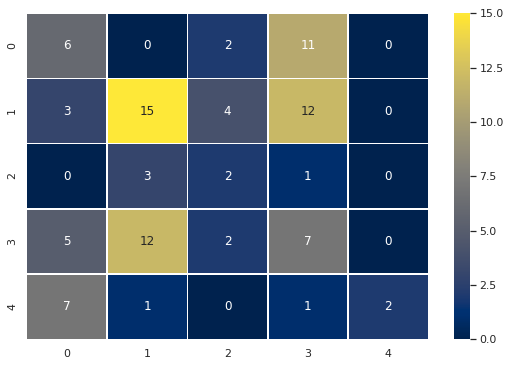

In [364]:
sns.set()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(Cluster_matrix, annot=True, fmt="d", linewidths=.5, ax=ax, cmap ='cividis')